In [1]:
import json
import pandas as pd
import numpy as np
from textblob import TextBlob
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
colors = ["#6eccf4", "#ebc8a0"]

# Preporcessing

In [3]:
df_data = pd.read_excel("./data/data1_cleaned.xlsx")
df_data

,Type,Script,Mode,SageName,SageData,play_data_section_0,play_data_section_1,play_data_section_2,play_data_section_3,play_data_section_4,...,play_data_section_36,play_data_section_37,play_data_section_38,play_data_section_39,play_data_section_40,play_data_section_41,play_data_section_42,play_data_section_43,play_data_section_44,play_data_section_45
0,No Sage,HarryPotter,hybrid-agent,NaN,[],"{'keywords': 'Harry Potter, wizard, magical', ...","{'keywords': 'Triwizard Tournament, prophecy, ...","{'keywords': 'prophecy, guidance, fate', 'stor...","{'keywords': 'prophecy, destiny, battle', 'sto...","{'keywords': 'horcruxes, clues, prophecies, al...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No Sage,HarryPotter,hybrid-agent,Rabindranath Tagore,[],"{'keywords': 'Harry Potter, wizard, magical', ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No Sage,Witcher,hybrid-agent,NaN,[],"{'keywords': 'Geralt, monster, political, comb...","{'keywords': 'meeting, mysterious, magical', '...","{'keywords': 'village, elders, information, gu...","{'keywords': 'village, mysterious artifact, en...","{'keywords': 'village, enchanted forest, artif...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No Sage,HarryPotter,hybrid-agent,NaN,[],"{'keywords': 'Harry Potter, wizard, magical', ...","{'keywords': 'Hogwarts, Potions class, mysteri...","{'keywords': 'mysterious object, hidden, exami...","{'keywords': 'forgotten artifact, immense powe...","{'keywords': 'artifact, hidden knowledge, inve...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No Sage,HarryPotter,hybrid-agent,NaN,[],"{'keywords': 'Harry Potter, wizard, magical', ...","{'keywords': 'growing up, new threat, secret m...","{'keywords': 'secret mission, uncover truth, D...","{'keywords': 'secret mission, undercover, emer...","{'keywords': 'undercover, disguises, Polyjuice...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,No Sage,HarryPotter,hybrid-agent,NaN,[],"{'keywords': 'Harry Potter, wizard, magical', ...","{'keywords': 'Triwizard Tournament, prophecy, ...","{'keywords': 'prophecy, truth, guidance, mento...","{'keywords': 'prophecy, destiny, mentors', 'st...","{'keywords': 'library, book, secrets', 'story'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No Sage,Witcher,hybrid-agent,NaN,[],"{'keywords': 'Geralt, monster, political, comb...","{'keywords': 'vampire, curse, secrets', 'story...","{'keywords': 'ancient spellbook, breaking curs...","{'keywords': 'ancient spellbook, vampire, curs...","{'keywords': 'spellbook, redemption, ancient o...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,No Sage,HarryPotter,hybrid-agent,NaN,[],"{'keywords': 'Harry Potter, wizard, magical', ...","{'keywords': 'Hogwarts, new teacher, mysteriou...",{'keywords': 'defense against the dark arts te...,"{'keywords': 'disappearances, investigation, d...","{'keywords': 'investigation, former Death Eate...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,No Sage,HarryPotter,hybrid-agent,NaN,[],"{'keywords': 'Harry Potter, wizard, magical', ...","{'keywords': 'Quidditch, new Defense Against t...","{'keywords': 'secret group, monitor, new teach...","{'keywords': 'Quidditch, Defense Against the D...","{'keywords': 'Quidditch, mysterious disappeara...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,No Sage,HarryPotter,hybrid-agent,NaN,[],"{'keywords': 'Harry Potter, wizard, magical', ...","{'keywords': 'Quidditch, love potion, time tra...","{'keywords': 'love potion, infatuated, Madam P...","{'keywords': 'love potion, antidote, infatuati...","{'keywords': 'Quidditch, distraction, studies'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Conversation Analysis

In [4]:
single_without = []
single_with = []
multi_without = []
multi_with = []

for row in range(len(df_data)):
    cate = df_data.loc[row, "Type"]

    if cate == "No Sage":
        for s_index in range(46):
            p = df_data.loc[row, f"play_data_section_{s_index}"]

            if pd.notna(p): 
                p = eval(p)
                if p["event_type"] == "generate-character" and "messages" in p:
                    single_without.append(p["messages"])   
                elif p["event_type"] == "generate-groupchat" and "messages" in p:
                    multi_without.append(p["messages"]) 
    else:
         for s_index in range(46):
            p = df_data.loc[row, f"play_data_section_{s_index}"]
            if pd.notna(p): 
                p = eval(p)
                if p["event_type"] == "generate-character" and "messages" in p:
                    single_with.append(p["messages"])
                elif p["event_type"] == "generate-groupchat" and "messages" in p:
                    multi_with.append(p["messages"]) 
        

In [5]:
def get_user_message_length_single(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["role"] == "user"] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

roles = [ "Harry", "Geralt", "Lin"]
def get_user_message_length_multi(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["speaker"] in roles] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

msg_single_without = get_user_message_length_single(single_without)
msg_single_with = get_user_message_length_single(single_with)
msg_multi_without = get_user_message_length_multi(multi_without)
msg_multi_with = get_user_message_length_multi(multi_with)

msg_lists = {"msg_single_without":msg_single_without, "msg_single_with":msg_single_with, "msg_multi_without":msg_multi_without, "msg_multi_with":msg_multi_with}

In [6]:
# test if normal distribution
# if p is > 0.05, we assume it is normal distribution, therefore, for don't think it belongs to t_test
for cat in msg_lists:
    stat, p = stats.shapiro(msg_lists[cat])
    print("Type:", cat , "   P_value:",p)

Type: msg_single_without    P_value: 7.451983695447398e-11
Type: msg_single_with    P_value: 2.5402159473937707e-08
Type: msg_multi_without    P_value: 4.348057138944282e-13
Type: msg_multi_with    P_value: 4.054332533764462e-09


## length of conversation message

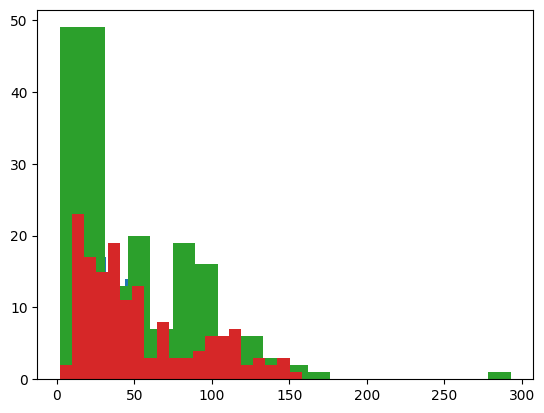

In [7]:
for cat in msg_lists:
    plt.hist(msg_lists[cat], bins = 20)
plt.show()

(array([31., 25., 23., 23., 17., 14.,  9., 14.,  8.,  3.,  4.,  3.,  0.,
         0.,  0.,  1.,  0.,  0.,  2.,  1.]),
 array([  2.,   8.,  14.,  20.,  26.,  32.,  38.,  44.,  50.,  56.,  62.,
         68.,  74.,  80.,  86.,  92.,  98., 104., 110., 116., 122.]),
 <BarContainer object of 20 artists>)

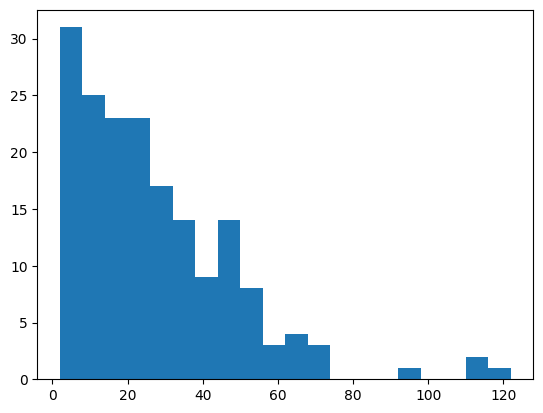

In [8]:
plt.hist(msg_single_without, bins = 20)

(array([29., 12., 17., 10., 10., 12., 11.,  4.,  8.,  5.,  5.,  3.,  2.,
         2.,  2.,  6.,  0.,  1.,  0.,  2.]),
 array([  2.  ,   7.05,  12.1 ,  17.15,  22.2 ,  27.25,  32.3 ,  37.35,
         42.4 ,  47.45,  52.5 ,  57.55,  62.6 ,  67.65,  72.7 ,  77.75,
         82.8 ,  87.85,  92.9 ,  97.95, 103.  ]),
 <BarContainer object of 20 artists>)

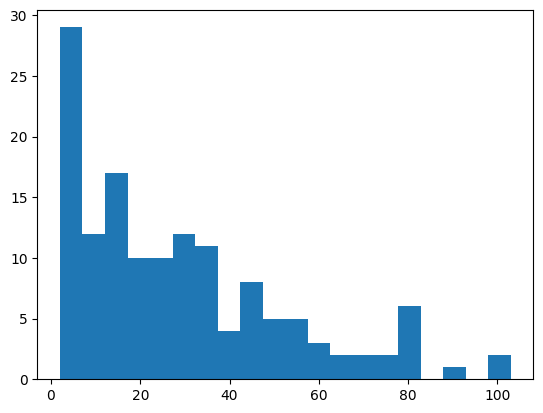

In [9]:
plt.hist(msg_single_with, bins = 20)

(array([49., 49., 13., 20.,  7., 19., 16.,  4.,  6.,  3.,  2.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2.  ,  16.55,  31.1 ,  45.65,  60.2 ,  74.75,  89.3 , 103.85,
        118.4 , 132.95, 147.5 , 162.05, 176.6 , 191.15, 205.7 , 220.25,
        234.8 , 249.35, 263.9 , 278.45, 293.  ]),
 <BarContainer object of 20 artists>)

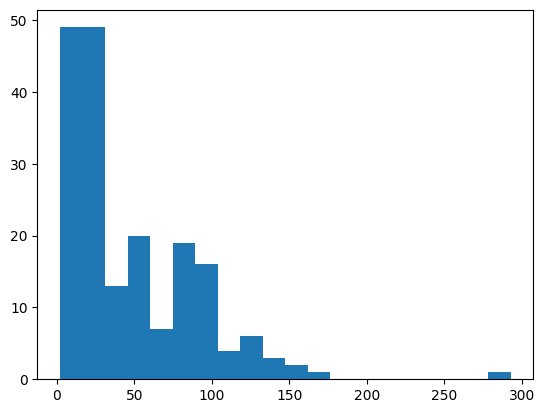

In [10]:
plt.hist(msg_multi_without, bins = 20)

(array([ 2., 23., 17., 15., 19., 11., 13.,  3.,  8.,  3.,  3.,  4.,  6.,
         6.,  7.,  2.,  3.,  2.,  3.,  1.]),
 array([  2. ,   9.8,  17.6,  25.4,  33.2,  41. ,  48.8,  56.6,  64.4,
         72.2,  80. ,  87.8,  95.6, 103.4, 111.2, 119. , 126.8, 134.6,
        142.4, 150.2, 158. ]),
 <BarContainer object of 20 artists>)

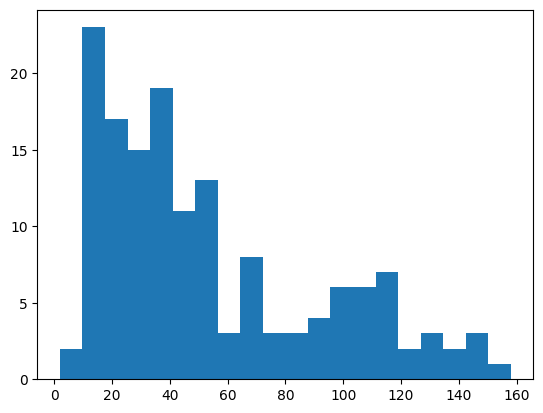

In [11]:
plt.hist(msg_multi_with, bins = 20)

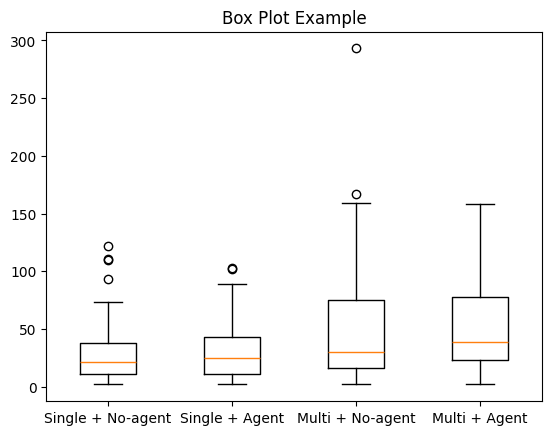

In [12]:
fig, ax = plt.subplots()

# Creating box plot
ax.boxplot([msg_single_without, msg_single_with, msg_multi_without,msg_multi_with])

# Adding titles and labels
ax.set_title('Box Plot Example')
ax.set_xticklabels(['Single + No-agent', 'Single + Agent','Multi + No-agent', 'Multi + Agent'])

# Showing the plot
plt.show()

### agent vs np_agent

In [13]:
print("U-test--agent vs no_agent-- conversation:   ", stats.mannwhitneyu(msg_single_without, msg_single_with) )
print("U-test--agent vs no_agent-- group chat:     ", stats.mannwhitneyu(msg_multi_without, msg_multi_with) )

U-test--agent vs no_agent-- conversation:    MannwhitneyuResult(statistic=np.float64(12114.5), pvalue=np.float64(0.5956502466128203))
U-test--agent vs no_agent-- group chat:      MannwhitneyuResult(statistic=np.float64(12126.0), pvalue=np.float64(0.014136703046595527))


### conversation_group_chat

In [14]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(msg_single_without, msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(msg_single_with, msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=np.float64(12018.5), pvalue=np.float64(1.6090448408022336e-06))
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=np.float64(6189.5), pvalue=np.float64(6.391351270370663e-10))


## word counts

In [15]:
def get_user_message_words_single(chat):
    user_message_lengths_list = [[len(msg["content"].split(" ")) for msg in msgs[1:] if msg["role"] == "user"] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

roles = [ "Harry", "Geralt", "Lin"]
def get_user_message_words_multi(chat):
    user_message_lengths_list = [[len(msg["content"].split(" ")) for msg in msgs[1:] if msg["speaker"] in roles] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

words_msg_single_without = get_user_message_words_single(single_without)
words_msg_single_with = get_user_message_words_single(single_with)
words_msg_multi_without = get_user_message_words_multi(multi_without)
words_msg_multi_with = get_user_message_words_multi(multi_with)

words_msg_lists = {"words_msg_single_without":words_msg_single_without, "words_msg_single_with":words_msg_single_with, 
                   "words_msg_multi_without":words_msg_multi_without, "words_msg_multi_with":words_msg_multi_with}

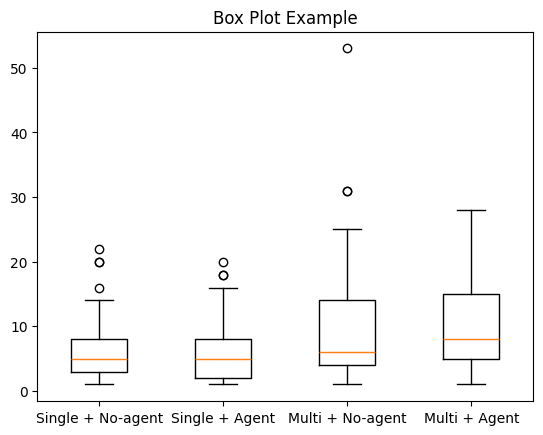

In [16]:
fig, ax = plt.subplots()

# Creating box plot
ax.boxplot([words_msg_single_without, words_msg_single_with, words_msg_multi_without,words_msg_multi_with])

# Adding titles and labels
ax.set_title('Box Plot Example')
ax.set_xticklabels(['Single + No-agent', 'Single + Agent','Multi + No-agent', 'Multi + Agent'])

# Showing the plot
plt.show()

### agent vs no_agent

In [17]:
print("U-test--agent vs no_agent-- conversation:   ", stats.mannwhitneyu(words_msg_single_without, words_msg_single_with) )
print("U-test--agent vs no_agent-- group chat:     ", stats.mannwhitneyu(words_msg_multi_without, words_msg_multi_with) )

U-test--agent vs no_agent-- conversation:    MannwhitneyuResult(statistic=np.float64(12152.5), pvalue=np.float64(0.6263956894958227))
U-test--agent vs no_agent-- group chat:      MannwhitneyuResult(statistic=np.float64(12196.5), pvalue=np.float64(0.017265950305472327))


### conversation_group_chat

In [18]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(words_msg_single_without, words_msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(words_msg_single_with, words_msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=np.float64(12376.5), pvalue=np.float64(8.054889929239051e-06))
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=np.float64(6393.0), pvalue=np.float64(3.397900112085237e-09))


## Sentiment of message

In [19]:
def get_senti(msgs):
    sentences = []
    polarity = []
    subjectivity = []
    for messages in msgs:
        for msg in messages[1:]:
            if "role" in msg and msg["role"] == "user":
                blob = TextBlob(msg["content"])

                # Get the sentiment
                sentiment = blob.sentiment
                sentences.append(msg["content"])
                polarity.append(sentiment.polarity)
                subjectivity.append(sentiment.subjectivity)
                
            elif "speaker" in msg and msg["speaker"] in roles:
                blob = TextBlob(msg["content"])

                # Get the sentiment
                sentiment = blob.sentiment
                sentences.append(msg["content"])
                polarity.append(sentiment.polarity)
                subjectivity.append(sentiment.subjectivity)
    return pd.DataFrame({"polarity":polarity, "subjectivity":subjectivity, "sentence":sentences})

sent_single_without = get_senti( single_without)
sent_single_with = get_senti( single_with)
sent_multi_without = get_senti( multi_without)
sent_multi_with = get_senti(multi_with)

sents = {"single_without":sent_single_without, "single_with":sent_single_with,"multi_without":sent_multi_without, "multi_with":sent_multi_with }

In [20]:
# test if normal distribution
# if p is > 0.05, we assume it is normal distribution, therefore, for don't think it belongs to t_test
for cat in sents:
    stat1, p1 = stats.shapiro(sents[cat]["polarity"])
    stat2, p2 = stats.shapiro(sents[cat]["subjectivity"])
    print("Type:", cat , "  polarity:",p1,"    subjectivity:",p2)

Type: single_without   polarity: 4.137213770735283e-13     subjectivity: 4.6109248633168646e-15
Type: single_with   polarity: 2.5758878754958024e-11     subjectivity: 1.9438784819889443e-13
Type: multi_without   polarity: 2.104912413473925e-12     subjectivity: 1.855439224724736e-14
Type: multi_with   polarity: 6.755564841596584e-12     subjectivity: 8.008255864087314e-14


### agent vs no_agent

In [27]:
# : scatter plot: no big difference across with/without agents

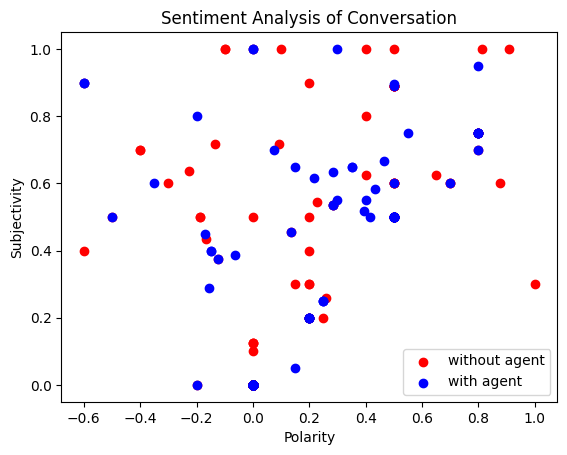

In [21]:
plt.scatter(sent_single_without['polarity'], sent_single_without['subjectivity'], color="red")
plt.scatter(sent_single_with['polarity'], sent_single_with['subjectivity'], color="blue")
plt.legend(["without agent", "with agent"], loc ="lower right") 
plt.title('Sentiment Analysis of Conversation')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Show the plot
plt.show()

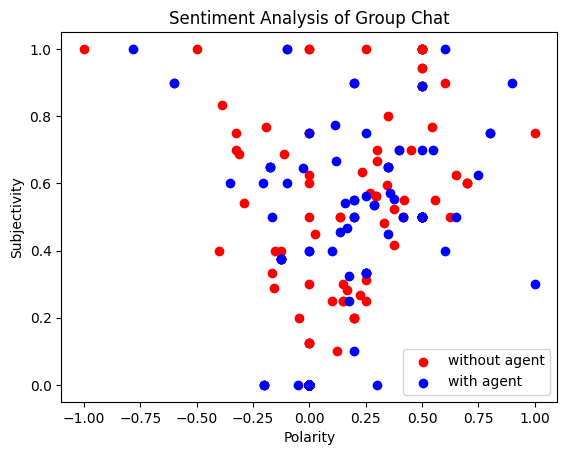

In [22]:
plt.scatter(sent_multi_without['polarity'], sent_multi_without['subjectivity'], color="red")
plt.scatter(sent_multi_with['polarity'], sent_multi_with['subjectivity'], color="blue")
plt.legend(["without agent", "with agent"], loc ="lower right") 
plt.title('Sentiment Analysis of Group Chat')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Show the plot
plt.show()

In [23]:
# p_value all larger than 0.05, so we don't think agent change polarity or subjectivity
print("single - polarity:   ", stats.mannwhitneyu(sent_single_without['polarity'], sent_single_with['polarity']))
print("single - subjectivity:   ", stats.mannwhitneyu(sent_single_without['subjectivity'], sent_single_with['subjectivity']))
print("multi - polarity:   ", stats.mannwhitneyu(sent_multi_without['polarity'], sent_single_with['polarity']))
print("multi - subjectivity:   ", stats.mannwhitneyu(sent_multi_without['subjectivity'], sent_single_with['subjectivity']))

single - polarity:    MannwhitneyuResult(statistic=np.float64(12672.5), pvalue=np.float64(0.8690236660922628))
single - subjectivity:    MannwhitneyuResult(statistic=np.float64(12820.0), pvalue=np.float64(0.7197149100546341))
multi - polarity:    MannwhitneyuResult(statistic=np.float64(13182.5), pvalue=np.float64(0.7887715169198106))
multi - subjectivity:    MannwhitneyuResult(statistic=np.float64(14482.5), pvalue=np.float64(0.17641619586799806))


### conversation vs group chat

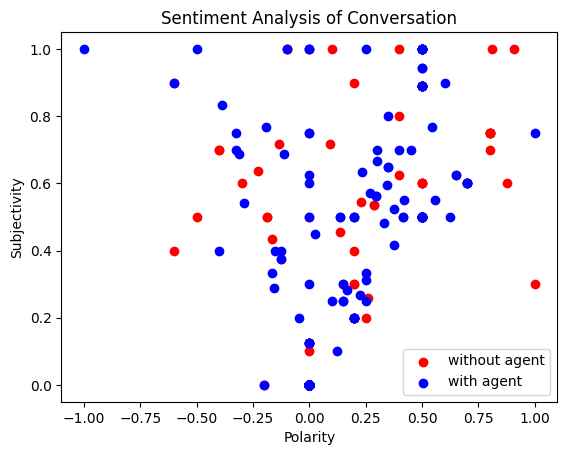

In [24]:
plt.scatter(sent_single_without['polarity'], sent_single_without['subjectivity'], color="red")
plt.scatter(sent_multi_without['polarity'], sent_multi_without['subjectivity'], color="blue")
plt.legend(["without agent", "with agent"], loc ="lower right") 
plt.title('Sentiment Analysis of Conversation')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Show the plot
plt.show()

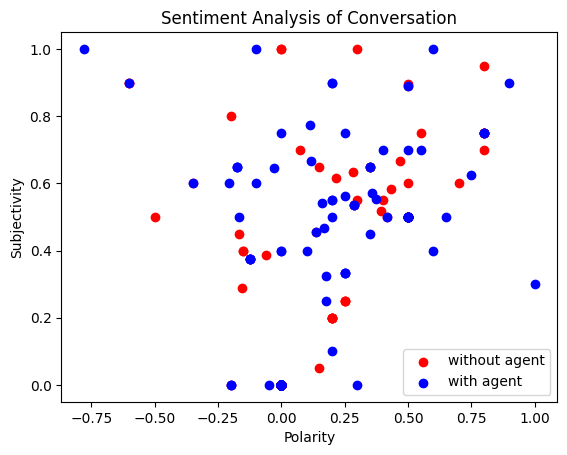

In [25]:
plt.scatter(sent_single_with['polarity'], sent_single_with['subjectivity'], color="red")
plt.scatter(sent_multi_with['polarity'], sent_multi_with['subjectivity'], color="blue")
plt.legend(["without agent", "with agent"], loc ="lower right") 
plt.title('Sentiment Analysis of Conversation')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Show the plot
plt.show()

In [26]:
# p_value all larger than 0.05, so we don't think grouchat change polarity or subjectivity
print("no_agent - polarity:   ", stats.mannwhitneyu(sent_single_without['polarity'], sent_multi_without['polarity']))
print("no_agent - subjectivity:   ", stats.mannwhitneyu(sent_single_without['subjectivity'], sent_multi_without['subjectivity']))
print("agent - polarity:   ", stats.mannwhitneyu(sent_single_with['polarity'], sent_multi_with['polarity']))
print("agent - subjectivity:   ", stats.mannwhitneyu(sent_single_with['subjectivity'], sent_multi_with['subjectivity']))

no_agent - polarity:    MannwhitneyuResult(statistic=np.float64(17344.0), pvalue=np.float64(0.6429469157912864))
no_agent - subjectivity:    MannwhitneyuResult(statistic=np.float64(15932.0), pvalue=np.float64(0.3055137035272155))
agent - polarity:    MannwhitneyuResult(statistic=np.float64(11238.5), pvalue=np.float64(0.36996356039148315))
agent - subjectivity:    MannwhitneyuResult(statistic=np.float64(10658.0), pvalue=np.float64(0.9855120371077102))


## number of messages per conversation

In [34]:
# based on following result, we don't think agent or group chat improvde user engagement in each chatiing

In [27]:
def get_user_message_count_single(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["role"] == "user"] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths.append(len(msg_list))
    return user_message_lengths

roles = [ "Harry", "Geralt", "Lin"]
def get_user_message_count_multi(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["speaker"] in roles] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths.append(len(msg_list))
    return user_message_lengths

count_msg_single_without = get_user_message_count_single(single_without)
count_msg_single_with = get_user_message_count_single(single_with)
count_msg_multi_without = get_user_message_count_multi(multi_without)
count_msg_multi_with = get_user_message_count_multi(multi_with)

count_msg_lists = {"count_msg_single_without":count_msg_single_without, "count_msg_single_with":count_msg_single_with, 
             "count_msg_multi_without":count_msg_multi_without, "count_msg_multi_with":count_msg_multi_with}

In [28]:
# test if normal distribution
# if p is > 0.05, we assume it is normal distribution, therefore, for don't think it belongs to t_test
for cat in count_msg_lists:
    stat, p = stats.shapiro(count_msg_lists[cat])
    print("Type:", cat , "   P_value:",p)

Type: count_msg_single_without    P_value: 6.611566497514757e-06
Type: count_msg_single_with    P_value: 0.00025015694303251126
Type: count_msg_multi_without    P_value: 0.00033886290628577017
Type: count_msg_multi_with    P_value: 0.0011399638066594056


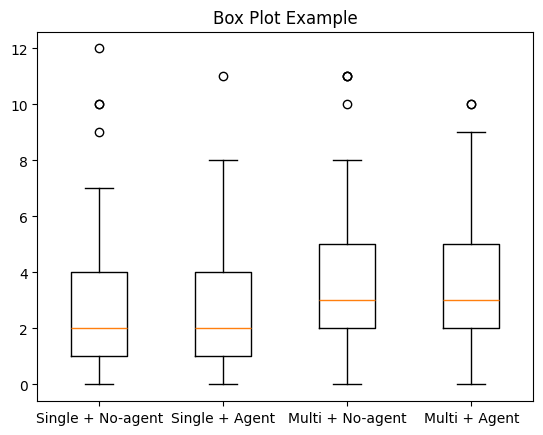

In [29]:
fig, ax = plt.subplots()

# Creating box plot
ax.boxplot([count_msg_single_without, count_msg_single_with, count_msg_multi_without,count_msg_multi_with])

# Adding titles and labels
ax.set_title('Box Plot Example')
ax.set_xticklabels(['Single + No-agent', 'Single + Agent','Multi + No-agent', 'Multi + Agent'])

# Showing the plot
plt.show()

In [30]:
print("U-test--agent vs no_agent-- conversation:   ", stats.mannwhitneyu(count_msg_single_without, count_msg_single_with) )
print("U-test--agent vs no_agent-- group chat:     ", stats.mannwhitneyu(count_msg_multi_without, count_msg_multi_with) )

U-test--agent vs no_agent-- conversation:    MannwhitneyuResult(statistic=np.float64(1583.0), pvalue=np.float64(0.6355045971055463))
U-test--agent vs no_agent-- group chat:      MannwhitneyuResult(statistic=np.float64(1059.0), pvalue=np.float64(0.9595464703748684))


In [31]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(count_msg_single_without, count_msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(count_msg_single_with, count_msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=np.float64(1352.0), pvalue=np.float64(0.2784424466008236))
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=np.float64(862.0), pvalue=np.float64(0.14591846995023905))


## combine

In [32]:
# position
def paint_two_box_plots(xr1, xr2, sg_height1, sg_height2, y_lim, y_title, first_group, second_group, colors, labels, significant_levels):

    # canvas
    fig, ax = plt.subplots(figsize=(8, 5))  
    ax.set_ylim(0, y_lim)

    # median line
    medianprops = {'color': 'black', 'linewidth': 1.5}
    
    # first one
    box1 = ax.boxplot(first_group, positions=xr1, widths=0.5, patch_artist=True, showfliers=False, medianprops=medianprops)
    for patch, color in zip(box1['boxes'], colors):
        patch.set_facecolor(color)
    
    # second one
    box2 = ax.boxplot(second_group, positions=xr2, widths=0.5, patch_artist=True, showfliers=False, medianprops=medianprops)
    for patch, color in zip(box2['boxes'], colors):
        patch.set_facecolor(color)
    
    # labels
    for xr, sg_height, significant_level in zip([xr1, xr2], [sg_height1, sg_height2], significant_levels):
        # vertical_height = 5 if sg_height == sg_height1 else 3
        vertical_height = sg_height1/40
        sig_height = sg_height1/20
        plt.plot([xr[0], xr[0]], [sg_height, sg_height - vertical_height], color='black')
        plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')
        plt.plot(xr, [sg_height, sg_height], color='black')
        plt.text(sum(xr) / 2, sg_height + sig_height, significant_level, ha='center', va='bottom')


        # Set custom x-axis labels
    ax.set_xticks([sum(xr1)/2, sum(xr2)/2])  # Setting x-ticks at the middle of each group
    ax.set_xticklabels(labels)  # Setting custom labels
    
    ax.set_ylabel(y_title)
    ax.yaxis.grid(True)
    plt.show()



### message length

U-test  Single vs Multi  (Without)  MannwhitneyuResult(statistic=np.float64(12018.5), pvalue=np.float64(1.6090448408022336e-06))
U-test  Single vs Multi  (With)  MannwhitneyuResult(statistic=np.float64(6189.5), pvalue=np.float64(6.391351270370663e-10))


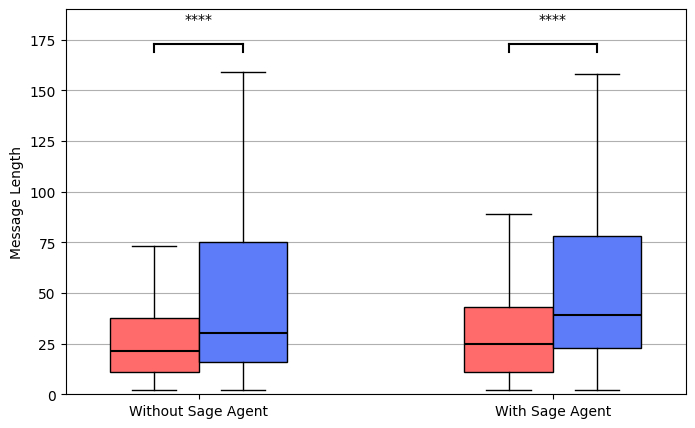

In [33]:
print("U-test  Single vs Multi  (Without) ", stats.mannwhitneyu(msg_single_without, msg_multi_without) ) 
print("U-test  Single vs Multi  (With) ", stats.mannwhitneyu(msg_single_with, msg_multi_with) ) 


paint_two_box_plots(
    xr1= [1, 1.5], 
    xr2=[3, 3.5], 
    sg_height1 = 173,
    sg_height2 = 173, 
    y_lim = 190,
    y_title = "Message Length",
    first_group = [msg_single_without, msg_multi_without], 
    second_group = [msg_single_with, msg_multi_with],
    colors = ["#ff6b6b", "#5c7cfa"],
    labels = ["Without Sage Agent", "With Sage Agent"],
    significant_levels = ["****", "****"]
)

U-test  Without vs With  (Single)  MannwhitneyuResult(statistic=np.float64(12114.5), pvalue=np.float64(0.5956502466128203))
U-test  Without vs With  (Multi)  MannwhitneyuResult(statistic=np.float64(12126.0), pvalue=np.float64(0.014136703046595527))


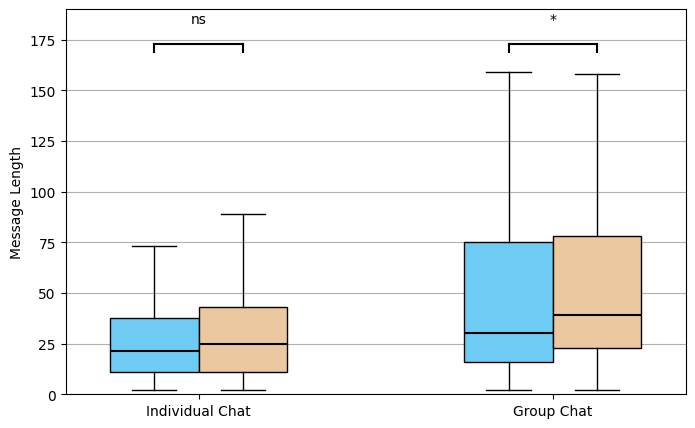

In [34]:
print("U-test  Without vs With  (Single) ", stats.mannwhitneyu(msg_single_without, msg_single_with  ) ) 
print("U-test  Without vs With  (Multi) ", stats.mannwhitneyu(msg_multi_without, msg_multi_with) ) 

paint_two_box_plots(
    xr1= [1, 1.5], 
    xr2=[3, 3.5], 
    sg_height1 = 173,
    sg_height2 = 173, 
    y_lim = 190,
    y_title = "Message Length",
    first_group = [msg_single_without, msg_single_with  ], 
    second_group = [msg_multi_without, msg_multi_with],
    colors = colors,
    labels = ["Individual Chat", "Group Chat"],
    significant_levels = ["ns", "*"]
)

### word counts

U-test  Single vs Multi  (Without)  MannwhitneyuResult(statistic=np.float64(12376.5), pvalue=np.float64(8.054889929239051e-06))
U-test  Single vs Multi  (With)  MannwhitneyuResult(statistic=np.float64(6393.0), pvalue=np.float64(3.397900112085237e-09))


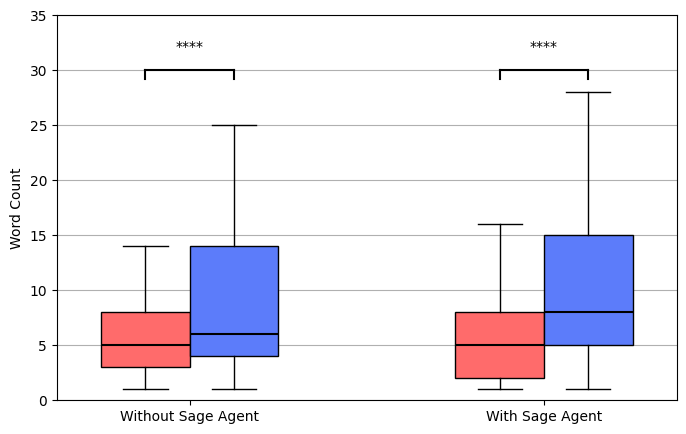

In [35]:
print("U-test  Single vs Multi  (Without) ", stats.mannwhitneyu(words_msg_single_without, words_msg_multi_without) ) 
print("U-test  Single vs Multi  (With) ", stats.mannwhitneyu(words_msg_single_with, words_msg_multi_with) ) 


paint_two_box_plots(
    xr1= [1, 1.5], 
    xr2=[3, 3.5], 
    sg_height1 = 30,
    sg_height2 = 30, 
    y_lim = 35,
    y_title = "Word Count",
    first_group = [words_msg_single_without, words_msg_multi_without], 
    second_group = [words_msg_single_with, words_msg_multi_with],
    colors = ["#ff6b6b", "#5c7cfa"],
    labels = ["Without Sage Agent", "With Sage Agent"],
    significant_levels = ["****", "****"]
)

U-test  Without vs With  (Single)  MannwhitneyuResult(statistic=np.float64(12152.5), pvalue=np.float64(0.6263956894958227))
U-test  Without vs With  (Multi)  MannwhitneyuResult(statistic=np.float64(12196.5), pvalue=np.float64(0.017265950305472327))


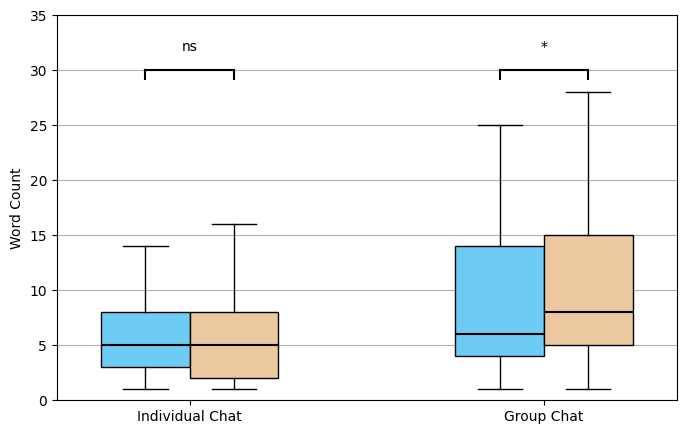

In [36]:
print("U-test  Without vs With  (Single) ", stats.mannwhitneyu(words_msg_single_without, words_msg_single_with ) ) 
print("U-test  Without vs With  (Multi) ", stats.mannwhitneyu(words_msg_multi_without, words_msg_multi_with) ) 


paint_two_box_plots(
    xr1= [1, 1.5], 
    xr2=[3, 3.5], 
    sg_height1 = 30,
    sg_height2 = 30, 
    y_lim = 35,
    y_title = "Word Count",
    first_group = [words_msg_single_without, words_msg_single_with ], 
    second_group = [words_msg_multi_without, words_msg_multi_with],
    colors = colors,
    labels = ["Individual Chat", "Group Chat"],
    significant_levels = ["ns", "*"]
)

### number of messages

U-test  Single vs Multi  (Without)  MannwhitneyuResult(statistic=np.float64(1352.0), pvalue=np.float64(0.2784424466008236))
U-test  Single vs Multi  (With)  MannwhitneyuResult(statistic=np.float64(862.0), pvalue=np.float64(0.14591846995023905))


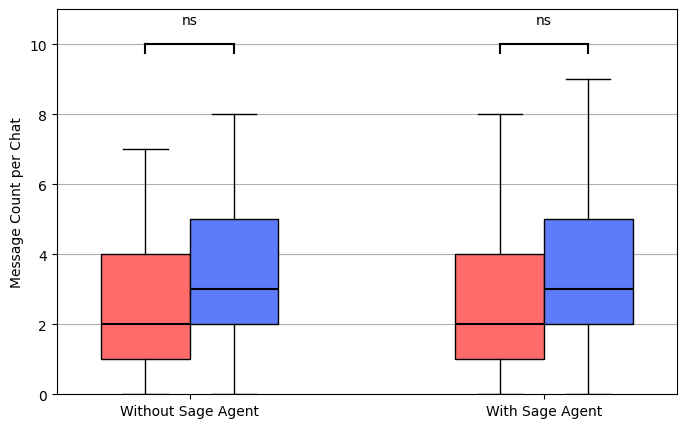

In [37]:
print("U-test  Single vs Multi  (Without) ", stats.mannwhitneyu(count_msg_single_without, count_msg_multi_without) ) 
print("U-test  Single vs Multi  (With) ", stats.mannwhitneyu(count_msg_single_with, count_msg_multi_with) ) 


paint_two_box_plots(
    xr1= [1, 1.5], 
    xr2=[3, 3.5], 
    sg_height1 = 10,
    sg_height2 = 10, 
    y_lim = 11,
    y_title = "Message Count per Chat",
    first_group = [count_msg_single_without, count_msg_multi_without], 
    second_group = [count_msg_single_with, count_msg_multi_with],
    colors = ["#ff6b6b", "#5c7cfa"],
    labels = ["Without Sage Agent", "With Sage Agent"],
    significant_levels = ["ns", "ns"]
)

U-test  Without vs With  (Single)  MannwhitneyuResult(statistic=np.float64(1583.0), pvalue=np.float64(0.6355045971055463))
U-test  Without vs With  (Multi)  MannwhitneyuResult(statistic=np.float64(1059.0), pvalue=np.float64(0.9595464703748684))


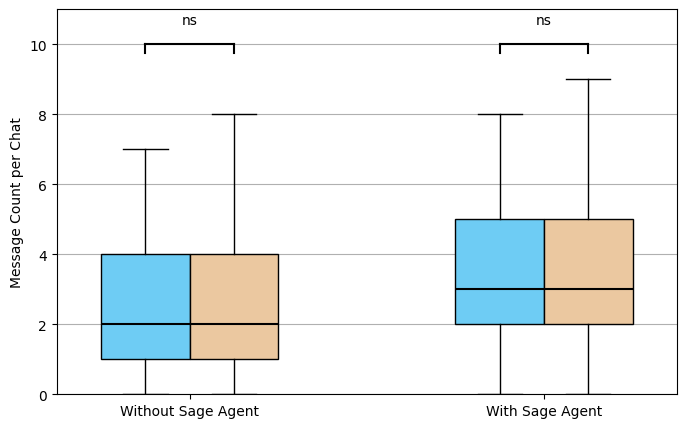

In [38]:
print("U-test  Without vs With  (Single) ", stats.mannwhitneyu(count_msg_single_without, count_msg_single_with  ) ) 
print("U-test  Without vs With  (Multi) ", stats.mannwhitneyu(count_msg_multi_without, count_msg_multi_with) ) 


paint_two_box_plots(
    xr1= [1, 1.5], 
    xr2=[3, 3.5], 
    sg_height1 = 10,
    sg_height2 = 10, 
    y_lim = 11,
    y_title = "Message Count per Chat",
    first_group = [count_msg_single_without, count_msg_single_with], 
    second_group = [count_msg_multi_without, count_msg_multi_with],
    colors = colors,
    labels = ["Without Sage Agent", "With Sage Agent"],
    significant_levels = ["ns", "ns"]
)

# Narration Arc and Cognition Tension

In [41]:
df_nar = pd.read_csv("./data/LIWC-22 Results - 38 File(s) - Narrative Arc Table.csv")
df_nar = df_nar.dropna()

In [42]:
df_nar.head()

,Filename,WC,Narrativity_Overall,Narrativity_Staging,Narrativity_PlotProg,Narrativity_CogTension,Staging_1,Staging_2,Staging_3,Staging_4,...,PlotProg_1,PlotProg_2,PlotProg_3,PlotProg_4,PlotProg_5,CogTension_1,CogTension_2,CogTension_3,CogTension_4,CogTension_5
0,story1_no_sage_1.txt,1660,10.42,-34.96,-6.56,72.79,-0.23,0.76,0.76,0.34,...,0.08,1.49,-0.92,-0.92,0.28,-0.87,0.27,0.27,1.40,-1.06
2,story3_no_sage_6.txt,925,51.30,54.25,47.70,51.96,0.85,0.85,0.46,-1.08,...,-0.84,-0.99,0.03,0.32,1.48,-0.50,-0.50,0.34,1.59,-0.92
3,story4_no_sage_9.txt,1656,-26.36,-36.93,-35.88,-6.26,-1.00,0.39,0.78,-1.14,...,0.68,0.18,-1.76,0.54,0.36,0.47,1.21,-1.36,0.30,-0.62
4,story5_no_sage_11.txt,1639,1.26,-12.88,-41.53,58.19,0.07,0.73,1.13,-0.59,...,0.87,-0.30,0.58,-1.61,0.46,-1.06,0.20,1.58,-0.56,-0.17
5,story6_no_sage_13.txt,1137,66.78,61.64,45.16,93.53,0.78,-0.72,-1.20,-0.06,...,-0.54,-0.18,1.29,0.68,-1.24,-1.55,-0.30,0.96,0.76,0.13


In [43]:
df_nar_no_sage = df_nar.iloc[0:18,]
df_nar_sage = df_nar.iloc[18:,]
df_nar_sage

,Filename,WC,Narrativity_Overall,Narrativity_Staging,Narrativity_PlotProg,Narrativity_CogTension,Staging_1,Staging_2,Staging_3,Staging_4,...,PlotProg_1,PlotProg_2,PlotProg_3,PlotProg_4,PlotProg_5,CogTension_1,CogTension_2,CogTension_3,CogTension_4,CogTension_5
19,story20_sage_2.txt,313,36.27,18.53,68.12,22.16,0.35,1.29,0.04,-1.47,...,-1.07,-0.70,-0.33,1.23,0.86,-0.53,-1.39,0.32,1.24,0.37
20,story21_sage_5.txt,1287,-25.52,-75.18,-3.86,2.49,-1.64,0.56,-0.19,0.36,...,0.23,-1.26,0.70,1.12,-0.79,-0.25,1.55,-0.84,-0.84,0.37
21,story22_sage_7.txt,1193,34.05,45.17,-7.97,64.94,1.04,-1.63,0.44,-0.07,...,-0.08,0.26,-0.08,-1.45,1.35,-0.43,1.50,0.34,-0.22,-1.19
22,story23_sage_10.txt,1815,-20.65,6.50,-7.32,-61.13,0.20,-0.94,1.62,-0.65,...,0.19,1.64,-0.77,-0.77,-0.29,0.85,-1.54,-0.48,0.58,0.58
23,story24_sage_12.txt,1201,-21.16,20.87,-93.26,8.89,0.40,-0.67,-1.25,1.34,...,1.49,0.32,0.01,-0.91,-0.91,-0.57,1.32,-1.19,-0.25,0.69
24,story25_sage_14.txt,986,-2.67,-39.13,5.02,26.09,-1.06,0.41,0.41,-0.99,...,-0.31,-0.80,-0.98,0.78,1.31,-1.25,-0.09,0.14,-0.32,1.52
25,story26_sage_17.txt,1275,36.16,73.89,77.58,-42.99,1.15,0.84,-0.70,-1.21,...,-1.15,-0.92,0.38,1.20,0.49,-0.36,-1.02,-0.36,0.09,1.64
26,story27_sage_20.txt,2124,-27.14,-67.77,44.21,-57.87,-1.25,-0.25,-0.45,1.35,...,-1.15,0.53,0.04,-0.76,1.35,0.45,0.26,-0.49,-1.43,1.21
27,story28_sage_21.txt,782,45.25,28.98,79.97,26.80,0.68,1.16,-1.41,0.03,...,-1.32,-0.73,1.08,0.68,0.29,-1.19,-0.45,0.05,0.05,1.54
28,story29_sage_24.txt,736,-22.11,-14.43,-40.90,-11.00,-0.19,0.60,1.34,-1.25,...,1.07,-0.66,-0.66,1.11,-0.86,1.01,-0.25,0.72,0.07,-1.55


## radar

[ -4.62111111 -12.81444444  -9.11944444   8.07        -4.62111111]   [0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]
[ 2.04        4.53833333 -3.87888889  5.45888889  2.04      ]   [0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]


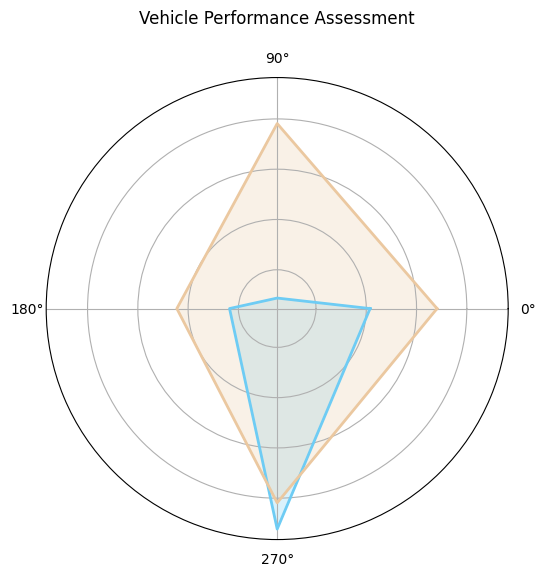

In [44]:
labels=np.array(['Narrativity_Overall', 'Narrativity_Staging', 'Narrativity_PlotProg', 'Narrativity_CogTension'])
data1=np.array([df_nar_no_sage["Narrativity_Overall"].mean(),
                df_nar_no_sage["Narrativity_Staging"].mean(),
                df_nar_no_sage["Narrativity_PlotProg"].mean(),
                df_nar_no_sage["Narrativity_CogTension"].mean(),
               ])
data2=np.array([df_nar_sage["Narrativity_Overall"].mean(),
                df_nar_sage["Narrativity_Staging"].mean(),
                df_nar_sage["Narrativity_PlotProg"].mean(),
                df_nar_sage["Narrativity_CogTension"].mean(),
               ])


def draw_radar(labels, *datas):
    # Create radar plot
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles+=angles[:1]

    # The plot is circular, so we need to "complete the loop" and append the start to the end.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    count = 0
    for data in datas:
        count += 1
        processed_data=np.concatenate((data,[data[0]]))
        
        print(processed_data, " ", angles)
        ax.fill(angles, processed_data, color=colors[count-1], alpha=0.25)
        ax.plot(angles, processed_data, color=colors[count-1], linewidth=2)  # Change the color if needed

    # Labels for each point
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    # ax.set_xticklabels(labels)

    # Title of the plot
    ax.set_title('Vehicle Performance Assessment', y=1.1)

    # legend_patches = [
    #     mpatches.Patch(color=colors[0], label='No Agent'),
    #     mpatches.Patch(color=colors[1], label='With Agent')
    # ]
    # ax.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(0.1, 0.1))
    # plt.show()
draw_radar(labels, data1, data2)

In [45]:
data1

array([ -4.62111111, -12.81444444,  -9.11944444,   8.07      ])

In [46]:
data2

array([ 2.04      ,  4.53833333, -3.87888889,  5.45888889])

In [47]:
print("Narrativity_Overall", stats.mannwhitneyu(df_nar_no_sage["Narrativity_Overall"], df_nar_sage["Narrativity_Overall"]))
print("Narrativity_Staging", stats.mannwhitneyu(df_nar_no_sage["Narrativity_Staging"], df_nar_sage["Narrativity_Staging"]))
print("Narrativity_PlotProg", stats.mannwhitneyu(df_nar_no_sage["Narrativity_PlotProg"], df_nar_sage["Narrativity_PlotProg"]))
print("Narrativity_CogTension", stats.mannwhitneyu(df_nar_no_sage["Narrativity_CogTension"], df_nar_sage["Narrativity_CogTension"]))

Narrativity_Overall MannwhitneyuResult(statistic=np.float64(139.0), pvalue=np.float64(0.4765462117850495))
Narrativity_Staging MannwhitneyuResult(statistic=np.float64(133.0), pvalue=np.float64(0.36721620202250527))
Narrativity_PlotProg MannwhitneyuResult(statistic=np.float64(151.0), pvalue=np.float64(0.7397342431142654))
Narrativity_CogTension MannwhitneyuResult(statistic=np.float64(166.0), pvalue=np.float64(0.911826411753384))


In [48]:
def draw_lines(labels, data1, data2):
    # Sample data

    #data1
    # Plotting the lines
    plt.plot(labels, data1[0], label='.25 Quantile', color="#fff")
    plt.plot(labels, data1[1], label='median', color=colors[0])
    plt.plot(labels, data1[2], label='.75 Quantile' , color="#fff")

    # Filling the area between the lines
    plt.fill_between(labels, data1[0],data1[1], color=colors[0], alpha=0.3)
    plt.fill_between(labels, data1[1], data1[2], color=colors[0], alpha=0.3)
    
    
    
    
    #Data2
    plt.plot(labels, data2[0], label='.25 Quantile', color="#fff")
    plt.plot(labels, data2[1], label='median', color=colors[1])
    plt.plot(labels, data2[2], label='.75 Quantile' , color="#fff")

    # Filling the area between the lines
    plt.fill_between(labels, data2[0],data2[1], color=colors[1], alpha=0.3)
    plt.fill_between(labels, data2[1], data2[2], color=colors[1], alpha=0.3)

    # Adding labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Line Plot with Filled Areas')
    plt.legend()

    # Display the plot
    plt.show()

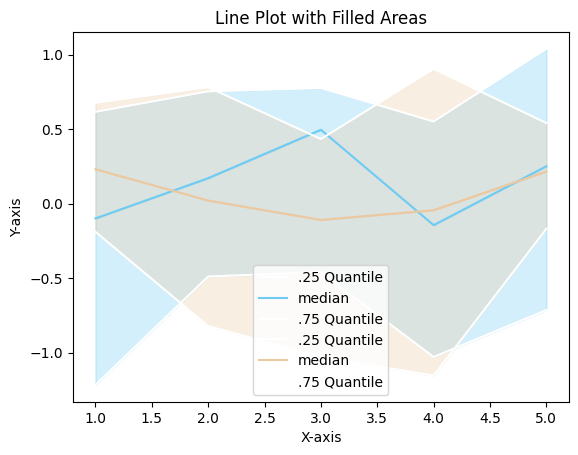

In [49]:
data_stage_no_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
data_stage_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
columns = ['Staging_1',
       'Staging_2', 'Staging_3', 'Staging_4', 'Staging_5']
for c in columns:
    data_stage_no_agent[0].append(df_nar_no_sage[c].quantile(0.25))
    data_stage_no_agent[1].append(df_nar_no_sage[c].quantile(0.5))
    data_stage_no_agent[2].append(df_nar_no_sage[c].quantile(0.75))
    
    data_stage_agent[0].append(df_nar_sage[c].quantile(0.25))
    data_stage_agent[1].append(df_nar_sage[c].quantile(0.5))
    data_stage_agent[2].append(df_nar_sage[c].quantile(0.75))

draw_lines([1,2,3,4,5], data_stage_no_agent, data_stage_agent)

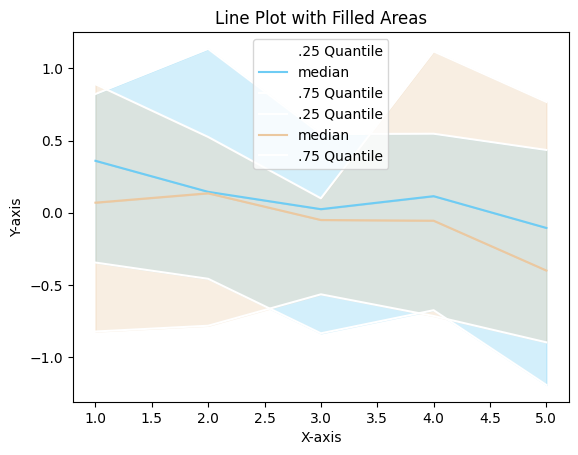

In [50]:
data_prog_no_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
data_prog_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
columns = ['PlotProg_1',
       'PlotProg_2', 'PlotProg_3', 'PlotProg_4', 'PlotProg_5']
for c in columns:
    data_prog_no_agent[0].append(df_nar_no_sage[c].quantile(0.25))
    data_prog_no_agent[1].append(df_nar_no_sage[c].quantile(0.5))
    data_prog_no_agent[2].append(df_nar_no_sage[c].quantile(0.75))
    
    data_prog_agent[0].append(df_nar_sage[c].quantile(0.25))
    data_prog_agent[1].append(df_nar_sage[c].quantile(0.5))
    data_prog_agent[2].append(df_nar_sage[c].quantile(0.75))

draw_lines([1,2,3,4,5], data_prog_no_agent, data_prog_agent)

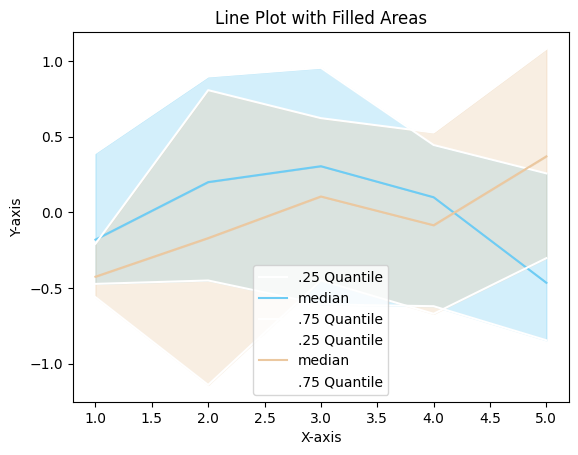

In [51]:
data_tension_no_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
data_tension_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
columns = ['CogTension_1',
       'CogTension_2', 'CogTension_3', 'CogTension_4', 'CogTension_5']
for c in columns:
    data_tension_no_agent[0].append(df_nar_no_sage[c].quantile(0.25))
    data_tension_no_agent[1].append(df_nar_no_sage[c].quantile(0.5))
    data_tension_no_agent[2].append(df_nar_no_sage[c].quantile(0.75))
    
    data_tension_agent[0].append(df_nar_sage[c].quantile(0.25))
    data_tension_agent[1].append(df_nar_sage[c].quantile(0.5))
    data_tension_agent[2].append(df_nar_sage[c].quantile(0.75))

draw_lines([1,2,3,4,5], data_tension_no_agent, data_tension_agent)

In [52]:
data_tension_agent

[[np.float64(-0.5599999999999999),
  np.float64(-1.14),
  np.float64(-0.44999999999999996),
  np.float64(-0.67),
  np.float64(-0.3025)],
 [np.float64(-0.425),
  np.float64(-0.16999999999999998),
  np.float64(0.10500000000000001),
  np.float64(-0.085),
  np.float64(0.37)],
 [np.float64(-0.20750000000000002),
  np.float64(0.8075),
  np.float64(0.6225),
  np.float64(0.5275),
  np.float64(1.08)]]

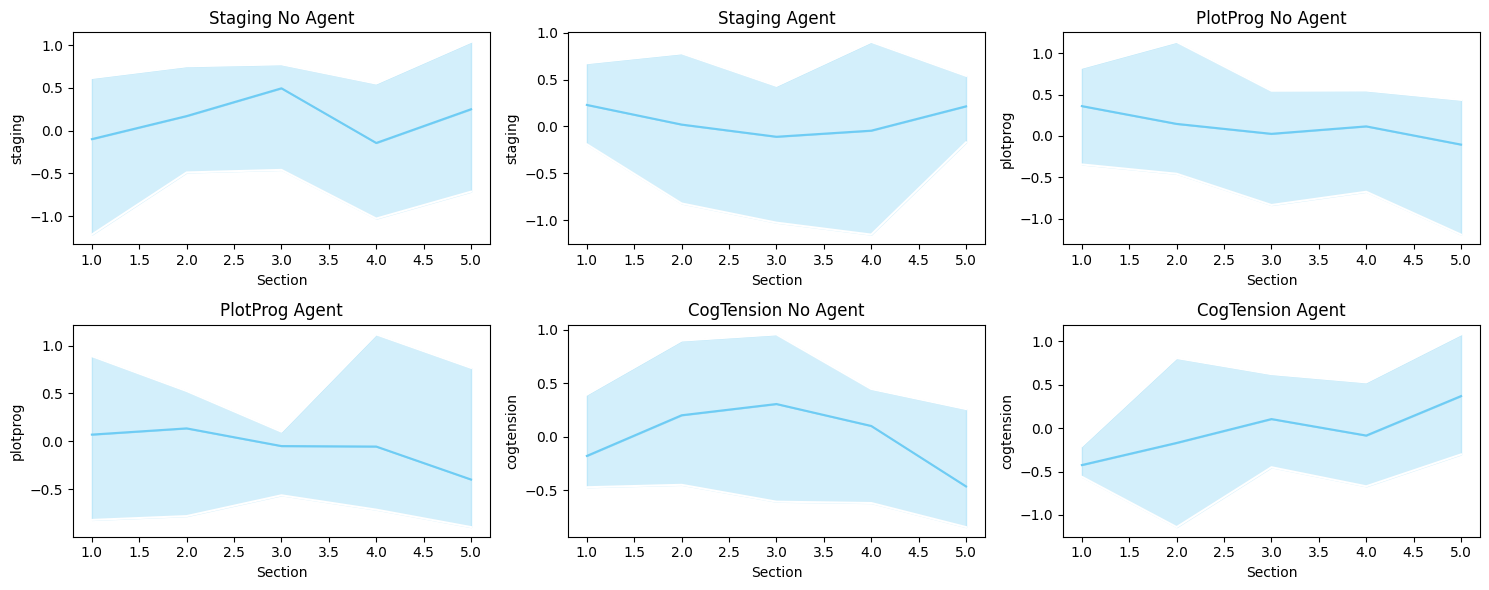

In [53]:
def draw_3_2_area_plot(x, titles, x_labels, y_labels ,*datas):
    plt.figure(figsize=(15, 6))
    
    count = 0
    for data in datas:
        count += 1
        plt.subplot(2, 3, count) 
        plt.plot(x, data[0], label='.25 Quantile', color="#fff")
        plt.plot(x, data[1], label='median', color=colors[0])
        plt.plot(x, data[2], label='.75 Quantile' , color="#fff")
        plt.fill_between(x, data[0], data[1], color=colors[0], alpha=0.3)
        plt.fill_between(x, data[1], data[2], color=colors[0], alpha=0.3)
        
        plt.title(titles[count - 1])
        plt.xlabel(x_labels[count - 1])
        plt.ylabel(y_labels[count - 1])
    
    plt.tight_layout()

    # Display the plot
    plt.show()
    
draw_3_2_area_plot([1,2,3,4,5],
                   ["Staging No Agent","Staging Agent","PlotProg No Agent","PlotProg Agent","CogTension No Agent","CogTension Agent" ],
                   ["Section"]*6,
                   ["staging", "staging", "plotprog", "plotprog", "cogtension","cogtension"] ,
                   data_stage_no_agent,
                   data_stage_agent,
                   data_prog_no_agent,
                   data_prog_agent,
                   data_tension_no_agent,
                   data_tension_agent
                  )

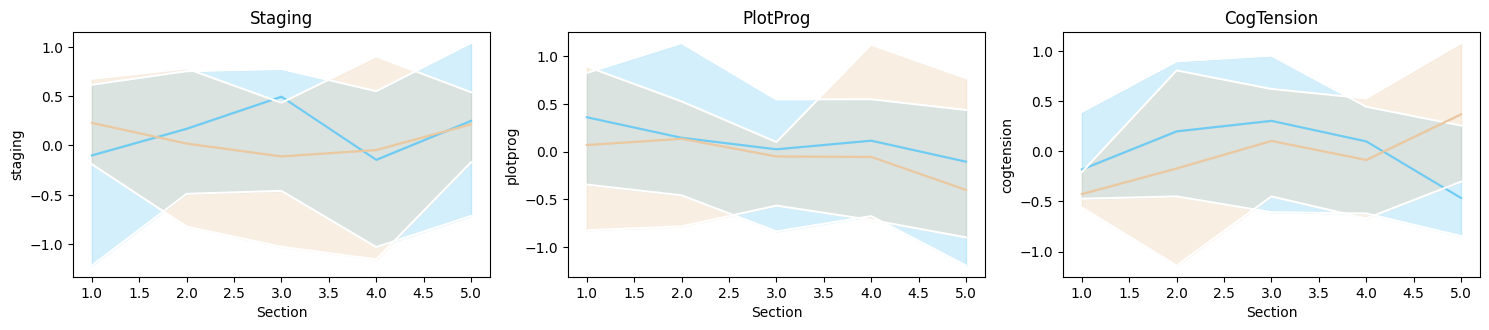

In [54]:
def draw_3_1_area_plot(x,titles,x_labels,y_labels ,*datas):
    plt.figure(figsize=(15, 6))
    
    for i in range(0,6,2):
        plt.subplot(2, 3, i//2 + 1) 
        plt.plot(x, datas[i][0], label='.25 Quantile', color="#fff")
        plt.plot(x, datas[i][1], label='median', color=colors[0])
        plt.plot(x, datas[i][2], label='.75 Quantile' , color="#fff")
        plt.fill_between(x, datas[i][0], datas[i][1], color=colors[0], alpha=0.3)
        plt.fill_between(x, datas[i][1], datas[i][2], color=colors[0], alpha=0.3)
        
        
        
        plt.plot(x, datas[i+1][0], label='.25 Quantile', color="#fff")
        plt.plot(x, datas[i+1][1], label='median', color=colors[1])
        plt.plot(x, datas[i+1][2], label='.75 Quantile' , color="#fff")
        plt.fill_between(x, datas[i+1][0], datas[i+1][1], color=colors[1], alpha=0.3)
        plt.fill_between(x, datas[i+1][1], datas[i+1][2], color=colors[1], alpha=0.3)
        
        plt.title(titles[i//2])
        plt.xlabel(x_labels[i//2])
        plt.ylabel(y_labels[i//2])
    
    plt.tight_layout()

    # Display the plot
    # fig.legend(lines, labels, loc='lower center', ncol=4)
    plt.show()
    
draw_3_1_area_plot([1,2,3,4,5],
                   ["Staging","PlotProg","CogTension"],
                   ["Section"]*3,
                   ["staging", "plotprog", "cogtension"] ,
                   data_stage_no_agent,
                   data_stage_agent,
                   data_prog_no_agent,
                   data_prog_agent,
                   data_tension_no_agent,
                   data_tension_agent
                  )